The dataset is taken from https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/ with their Big Mart Sales Prediction Problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

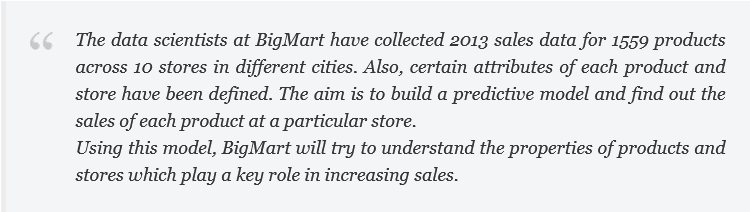

In [2]:
# load training and testing data
train = pd.read_csv('train_bmsales.csv')

test = pd.read_csv('test_bmsales.csv')

In [3]:
# create a new column to indicate train dataset and test dataset
train['source'] = 'train'

test['source'] = 'test'

print(train.shape, test.shape)

(8523, 13) (5681, 12)


In [4]:
# combine into one dataset
data = pd.concat([train, test], ignore_index=True, sort=False)

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


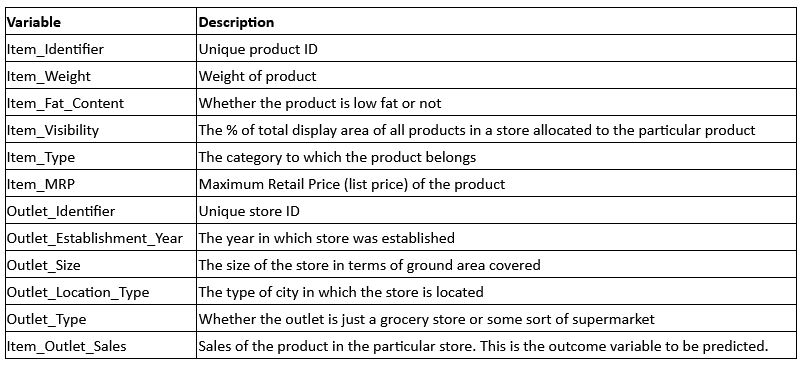

In [6]:
# data types
data.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [7]:
data.select_dtypes(include=['object']).head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [8]:
data.select_dtypes(include=['float64']).head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [9]:
data.select_dtypes(include=['int64']).head()

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987


In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

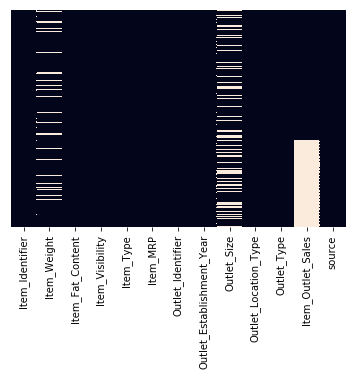

In [11]:
# missing values (ignore Item_Outlet_Sales)
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

data.isnull().sum()/len(data)*100

In [12]:
# modify column names for ease
data.columns = [n.lower() for n in data.columns]

## EDA

In [13]:
sns.set_theme(style="whitegrid")

### Unique Values

In [14]:
# no. of unique values from each columns
data.apply(lambda x:x.nunique())

item_identifier               1559
item_weight                    415
item_fat_content                 5
item_visibility              13006
item_type                       16
item_mrp                      8052
outlet_identifier               10
outlet_establishment_year        9
outlet_size                      3
outlet_location_type             3
outlet_type                      4
item_outlet_sales             3493
source                           2
dtype: int64

In [15]:
# unique values in object type columns
data.select_dtypes(include=['object']).apply(lambda x:x.nunique())

item_identifier         1559
item_fat_content           5
item_type                 16
outlet_identifier         10
outlet_size                3
outlet_location_type       3
outlet_type                4
source                     2
dtype: int64

In [16]:
# item_fat_content
data['item_fat_content'].value_counts(dropna=False)

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: item_fat_content, dtype: int64

- LF and low fat should be under Low Fat, same as reg should be Regular.
- combine these into the same label.

In [17]:
def fat_content(cols):
    if (cols == 'LF') or (cols == 'low fat'):
        return 'Low Fat'
    
    elif cols == 'reg':
        return 'Regular'
    
    else:
        return cols

In [18]:
data['item_fat_content'] = data['item_fat_content'].apply(fat_content)

data['item_fat_content'].value_counts(dropna=False)

Low Fat    9185
Regular    5019
Name: item_fat_content, dtype: int64

In [19]:
# item_types
data['item_type'].value_counts(dropna=False)

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: item_type, dtype: int64

- nothing specific or unordinary, maybe able to group some of the types together.

In [20]:
# outlet features
outlets = ['outlet_size','outlet_location_type','outlet_type']

for n in outlets:
    print(data[n].value_counts(dropna=False))
    print('\n')

Medium    4655
NaN       4016
Small     3980
High      1553
Name: outlet_size, dtype: int64


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: outlet_location_type, dtype: int64


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: outlet_type, dtype: int64




### Numerical Relationship

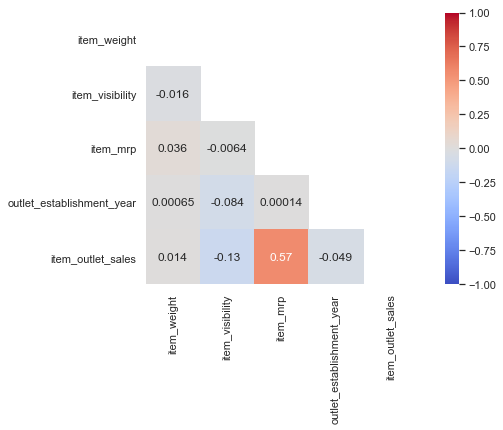

In [21]:
# correlation with each other
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), mask=mask, annot=True,
            square=True, cmap='coolwarm', vmin=-1, vmax=1)

- most numerical features have no correlation with each other.

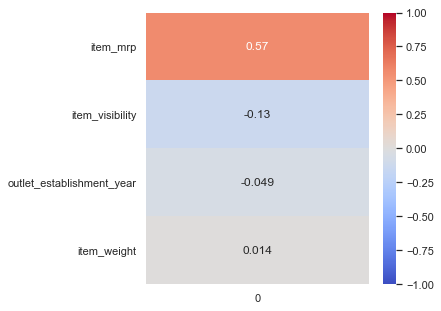

In [22]:
# correlation with target (Item_Outlet_Sales)
correlation = data.corrwith(data['item_outlet_sales']).iloc[:-1].to_frame()

correlation['abs'] = correlation[0].abs()

sort_correlation = correlation.sort_values('abs', ascending=False)[0]

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(sort_correlation.to_frame(), cmap='coolwarm', annot=True, ax=ax, vmin=-1, vmax=1)

- ITEM_MRP has a high positve correlation with ITEM_OUTLET_SALES.

Text(0.5,1,'Histogram of Item Weights')

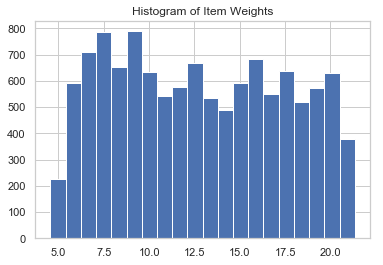

In [23]:
data['item_weight'].hist(bins=20)
plt.title('Histogram of Item Weights')

- items weights vary from 5kg to 20+kg.

Text(0.5,1,'Histogram of Item Visibility')

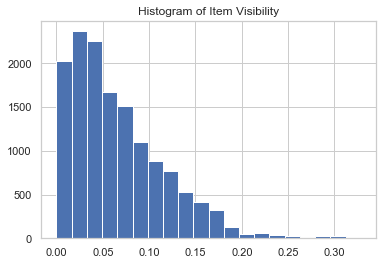

In [24]:
data['item_visibility'].hist(bins=20)
plt.title('Histogram of Item Visibility')

- only a few selected items have a visibility of more than 20%.

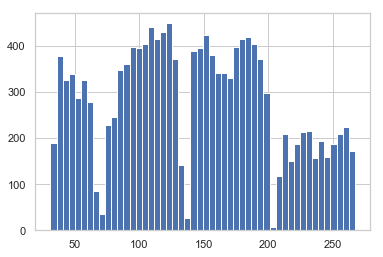

In [25]:
data['item_mrp'].hist(bins=50)

- the items retail prices varies from a certain range.
- might be able to group them into a specific range.*

Text(0.5,1,'Year of Outlets Formed')

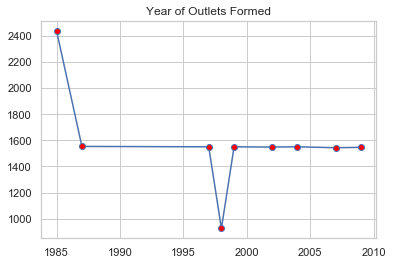

In [26]:
plt.plot(data['outlet_establishment_year'].value_counts().sort_index(ascending=True),
         marker='o', markerfacecolor="red")

plt.title('Year of Outlets Formed')

- most outlets were formed in 1985.
- the lowest outlets formed were in 1998.
- besides 1985 and 1998, there is an average of 1500 outlets formed throughout a period of years.

Text(0.5,1,'Outlet Sales vs Item Visibility')

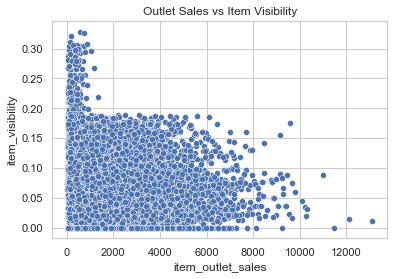

In [27]:
sns.scatterplot(y='item_visibility', x='item_outlet_sales', data=data)
plt.title('Outlet Sales vs Item Visibility')

- visibility of the item does not greatly impact the sales number.
- items that are 30% visible do not contributed much to higher sales.

### Categorical Relationship

Text(0.5,1,'Fat Content Items vs Outlet Sales')

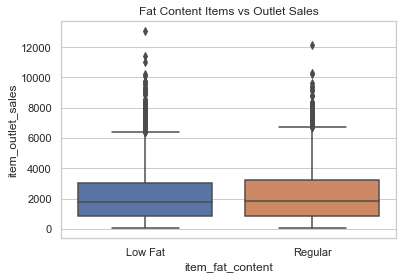

In [28]:
sns.boxplot(x='item_fat_content', y='item_outlet_sales', data=data)
plt.title('Fat Content Items vs Outlet Sales')

- the median sales for low fat and regular items are relatively similar.

Text(0.5,1,'Item Types vs Outlet Sales')

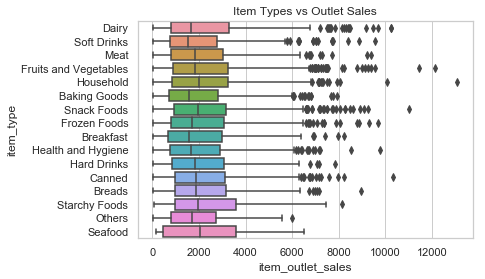

In [29]:
sns.boxplot(y='item_type', x='item_outlet_sales', data=data)
plt.title('Item Types vs Outlet Sales')

- there are a lot of varieties in item types, might be able to group them.*

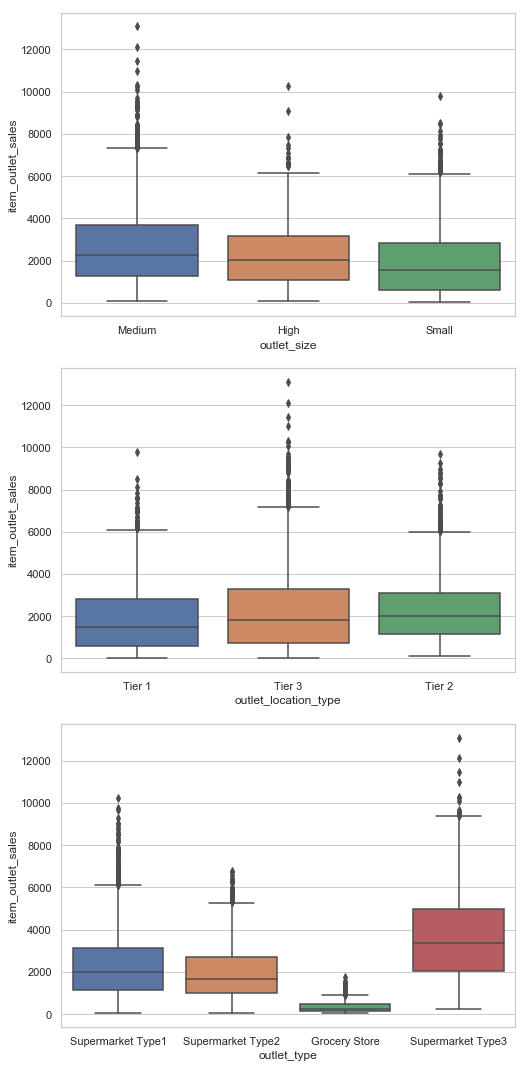

In [30]:
fig = plt.subplots(3,1,figsize=(7.5,15))

for n, outlet in enumerate(outlets):
    plt.subplot(3,1,n+1)
    sns.boxplot(x=outlet, y='item_outlet_sales', data=data)
    
plt.tight_layout()

- the size of the outlet have a small impact on the median sales.
- the location type of the outlet also have a small impact on the median sales.
- grocery store type outlets have the lowest sales.
- supermarket type3 have the highest sales, this might be a huge store or located at a populated area, need to identify the relationship with the other outlet features.

In [31]:
stack_plot1 = data.groupby(['outlet_type', 'outlet_size']).size().reset_index().pivot(columns='outlet_size', 
                                                                                     index='outlet_type', 
                                                                                     values=0)

stack_plot2 = data.groupby(['outlet_type', 'outlet_location_type']).size().reset_index().pivot(columns='outlet_location_type', 
                                                                                     index='outlet_type', 
                                                                                     values=0)

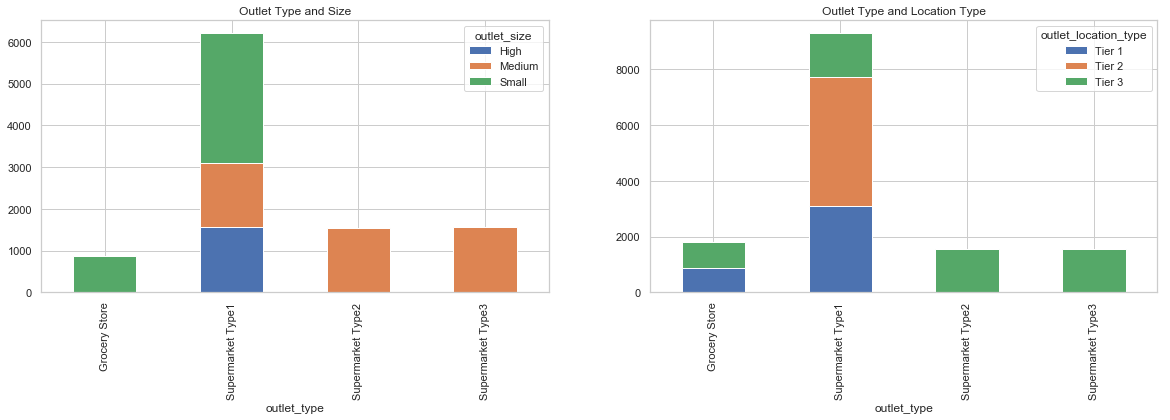

In [32]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

stack_plot1.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].title.set_text('Outlet Type and Size')

stack_plot2.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].title.set_text('Outlet Type and Location Type')

- Supermarket Type1 have 3 sizes, while Supermarket Type2 and Type3 are in medium size only.
- Grocery Store is small size.
- Due to Supermarket Type2 and Type3 have the same outlet size, it might be possible to combine them.

- Supermarket Type1 located at all 3 location types.
- Supermarket Type2 and Type3 are located only at Tier 3.
- Grocery Store located at Tier 1 and Tier 3.

In [33]:
print('Outlet Type by Size and Location Type')

data.groupby(['outlet_type', 'outlet_size','outlet_location_type']).size()

Outlet Type by Size and Location Type


outlet_type        outlet_size  outlet_location_type
Grocery Store      Small        Tier 1                   880
Supermarket Type1  High         Tier 3                  1553
                   Medium       Tier 1                  1550
                   Small        Tier 1                  1550
                                Tier 2                  1550
Supermarket Type2  Medium       Tier 3                  1546
Supermarket Type3  Medium       Tier 3                  1559
dtype: int64

- Supermarket Type1 that are located at Tier 3 are all large size outlets.
- It can be conclude that Tier 3 are locations with high population density.
- While Tier 1 are locations with low population density.

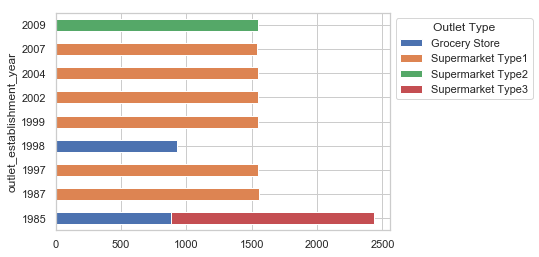

In [34]:
stack_plot3 = data.groupby(['outlet_type','outlet_establishment_year']).size().reset_index().pivot(columns='outlet_type', 
                                                                                     index='outlet_establishment_year', 
                                                                                     values=0)

stack_plot3.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1,1), title='Outlet Type')

- Supermrket Type3 are all formed in 1985, this might be the reason why they have the most sales as they were formed much earlier as compared to the other types.


## Feature Engineering

In [35]:
# 1. combine item types into groups based on their ID
data['item_identifier'][0][0:2]

'FD'

In [36]:
data['item_group'] = data['item_identifier'].apply(lambda x:x[0:2])

data['item_group'].value_counts()

FD    10201
NC     2686
DR     1317
Name: item_group, dtype: int64

In [37]:
data['item_group'] = data['item_group'].map({'FD':'Food', 
                                             'DR': 'Drinks',
                                             'NC': 'Non-consumable'})

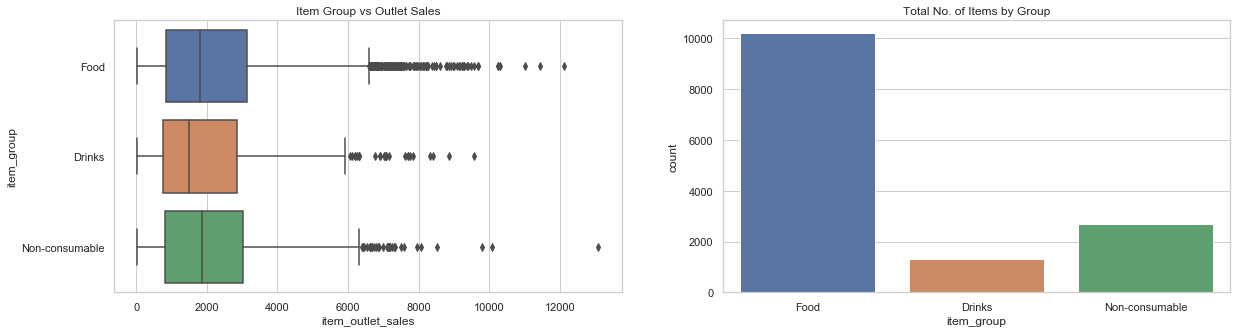

In [38]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(y='item_group', x='item_outlet_sales', data=data, ax=axes[0])
axes[0].title.set_text('Item Group vs Outlet Sales')

sns.countplot(x='item_group', data=data, ax=axes[1])
axes[1].title.set_text('Total No. of Items by Group')

- after grouping, it's much clearer to notice that the items sales are almost similar in trend.
- most of the items are food, with drinks being the least.

Text(0.5,1,'Item Fat Content and Item Group')

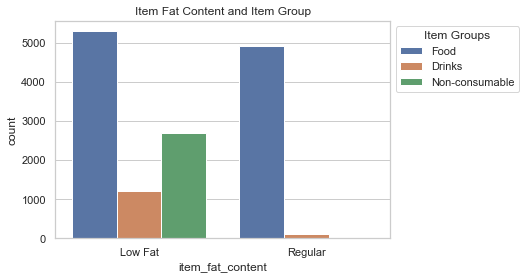

In [39]:
# 2. fat content item group
sns.countplot(x='item_fat_content', data=data, hue='item_group')

plt.legend(title='Item Groups',bbox_to_anchor=(1,1))

plt.title('Item Fat Content and Item Group')

- there are non-consumables which are categorize as low fat.
- we can seperated it from the edible groups.*

In [40]:
#data[data['item_group']=='Non-consumable']['item_fat_content'] = 'Non-edible (Low Fat)'
data.loc[data['item_group']=='Non-consumable', 'item_fat_content'] = 'Non-edible (Low Fat)'

Text(0.5,1,'Item Fat Content and Item Group')

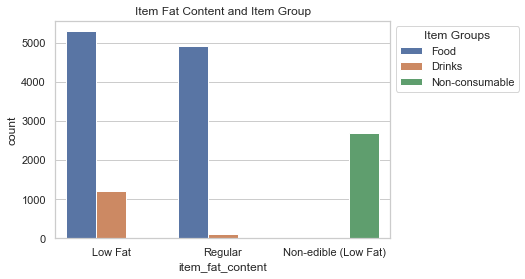

In [41]:
sns.countplot(x='item_fat_content', data=data, hue='item_group')

plt.legend(title='Item Groups',bbox_to_anchor=(1,1))

plt.title('Item Fat Content and Item Group')

In [42]:
# 3. retail price range

def price_range(cols):
    if cols < 75:
        return '< 75'
    elif 76 < cols < 150:
        return '76-150'
    elif 151 < cols < 225:
        return '151-225'
    else:
        return '> 225'

In [43]:
data['mrp_range'] = data['item_mrp'].apply(price_range)

In [44]:
data['mrp_range'].value_counts()

76-150     5400
151-225    4657
< 75       2304
> 225      1843
Name: mrp_range, dtype: int64

Text(0.5,1,'Item Retail Price Range vs Outlet Sales')

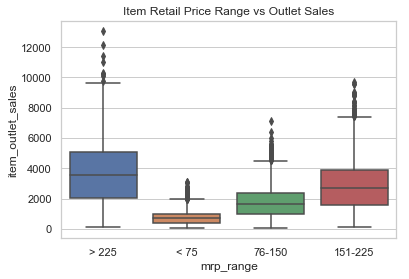

In [45]:
sns.boxplot(x='mrp_range', y='item_outlet_sales', data=data)

plt.title('Item Retail Price Range vs Outlet Sales')

- items with a retail price more than 150.00 have higher sales.

In [46]:
# 4. item visibility
mean_visibility = data.pivot_table(values='item_visibility', index='item_identifier')

mean_visibility.head()

,item_visibility
item_identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [47]:
data.loc[data['item_visibility']==0, 'item_visibility'] = data.loc[data['item_visibility']==0, 'item_identifier'].apply(lambda x:mean_visibility.loc[x])

- the item visibility that are zero are change to the mean value of it's own item visibility.

In [48]:
# 5. log tranform the target column
data['item_outlet_sales'] = np.log(data['item_outlet_sales'])

- to prevent negative values when predicting due to probable outliers.

## Cleaning Data

#### Fill Missing Values for ITEM_WEIGHT

In [49]:
data[data['item_identifier']=='FDP10']

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source,item_group,mrp_range
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,8.299724,train,Food,76-150
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,7.552510,train,Food,76-150
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,7.060034,train,Food,76-150
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.060034,train,Food,76-150
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,7.227088,train,Food,76-150
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,7.301196,train,Food,76-150
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,7.147045,train,Food,76-150
11896,FDP10,19.0,Low Fat,0.128612,Snack Foods,104.1622,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,Food,76-150
12371,FDP10,19.0,Low Fat,0.214397,Snack Foods,105.8622,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test,Food,76-150
13327,FDP10,NaN,Low Fat,0.224269,Snack Foods,104.4622,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test,Food,76-150


- impute the missing values based on item code.

In [50]:
item_avg_weight = data.pivot_table(values='item_weight', index='item_identifier')

item_avg_weight.head()

,item_weight
item_identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [51]:
data.loc[data['item_weight'].isnull(), 'item_weight'] = data.loc[data['item_weight'].isnull(), 'item_identifier'].apply(lambda x:item_avg_weight.loc[x])

#### Fill Missing Values for OUTLET_SIZE

- based on the the analysis done, all grocery type outlets are small in size and Supermarket Type2 & Type3 are all medium.
- on the same analysis, Supermarket Type1 is located at Tier 3 areas are all high in size and small size in Tier 2 areas.

In [52]:
data.groupby(['outlet_identifier','outlet_type','outlet_location_type','outlet_size']).size()

outlet_identifier  outlet_type        outlet_location_type  outlet_size
OUT013             Supermarket Type1  Tier 3                High           1553
OUT018             Supermarket Type2  Tier 3                Medium         1546
OUT019             Grocery Store      Tier 1                Small           880
OUT027             Supermarket Type3  Tier 3                Medium         1559
OUT035             Supermarket Type1  Tier 2                Small          1550
OUT046             Supermarket Type1  Tier 1                Small          1550
OUT049             Supermarket Type1  Tier 1                Medium         1550
dtype: int64

- based on this observation, outlets with store ID OUT046 are all small in size.
- outlets with store ID OUT049 are all medium in size.
- with these infomation we can impute the missing values from the OUTLET_SIZE column.

In [53]:
# missing values of outlet_size by outlet_type
data[data['outlet_size'].isnull()]['outlet_type'].value_counts()

Supermarket Type1    3091
Grocery Store         925
Name: outlet_type, dtype: int64

In [54]:
def size_type(cols):
    out_size = cols[0]
    out_type = cols[1]
    
    if out_type == 'Grocery Store':
        return 'Small'
    else:
        return out_size

In [55]:
def size_area(cols):
    out_size = cols[0]
    out_type = cols[1]
    out_location = cols[2]
    
    if (out_type == 'Supermarket Type1') and (out_location == 'Tier 3'):
        return 'High'
    elif (out_type == 'Supermarket Type1') and (out_location == 'Tier 2'):
        return 'Small'
    else:
        return out_size

In [56]:
def size_code(cols):
    out_size = cols[0]
    out_code = cols[1]
    
    if out_code == 'OUT046':
        return 'Small'
    elif out_code == 'OUT049':
        return 'Medium'
    else:
        return out_size

In [57]:
data['outlet_size'].fillna(data[['outlet_size','outlet_type']].apply(size_type, axis=1), inplace=True)

data['outlet_size'].fillna(data[['outlet_size','outlet_type','outlet_location_type']].apply(size_area, axis=1), inplace=True)

data['outlet_size'].fillna(data[['outlet_size','outlet_identifier']].apply(size_code, axis=1), inplace=True)

item_identifier               0.000000
item_weight                   0.000000
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                   0.000000
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales            39.995776
source                        0.000000
item_group                    0.000000
mrp_range                     0.000000
dtype: float64

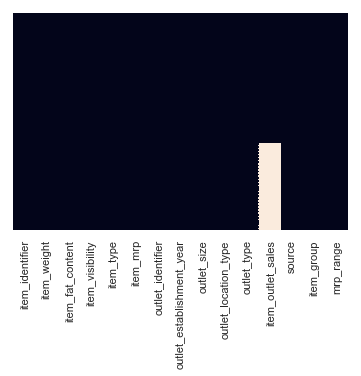

In [58]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)

data.isnull().sum()/len(data)*100

## Data Preprocessing
#### Encode Categorical with Dummy Values

In [59]:
data_encode = pd.get_dummies(data, 
                             columns=['item_fat_content','outlet_size', 'outlet_location_type',
                                      'outlet_type','item_group', 'mrp_range'], 
                             drop_first=True)

#### Split data to training and testing

In [60]:
# split data back into training and testing data sets.
train = data_encode[data_encode['source']=='train']

test = data_encode[data_encode['source']=='test']

In [61]:
# split training data set to train and test parts for model training.
X = train.drop(['item_identifier','outlet_identifier','item_type','source','item_outlet_sales'], axis=1)

y = train['item_outlet_sales']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model Selection

In [63]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
models = []

models.append(('LinReg', LinearRegression()))
models.append(('RidReg', Ridge()))
models.append(('LasReg', Lasso()))
models.append(('DTR', DecisionTreeRegressor(random_state=101)))
models.append(('RFR', RandomForestRegressor(random_state=101)))

In [65]:
# KFold use for regression
from sklearn.model_selection import KFold, cross_val_score

In [66]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LinReg: -0.2735419506356447 (0.012584999521821318)
RidReg: -0.2735593951540321 (0.0124573157829889)
LasReg: -0.7597221723654446 (0.046295381053662495)
DTR: -0.5538039855936374 (0.03305741429073098)
RFR: -0.3228976292247362 (0.01511711050378771)


- regression models provide a better MSE.

### Linear Regression

In [67]:
lr = LinearRegression()

lr.fit(X_train, y_train)

# model coefficients
lr.coef_

array([ 2.18355748e-04,  3.66349664e-02,  7.43366986e-03,  1.57985734e-02,
        5.97668891e-03,  1.61939779e-02, -3.86521547e-01, -3.92936106e-01,
       -8.47373732e-02, -2.40960548e-01,  1.72334789e+00,  1.59344338e+00,
        2.67701265e+00,  1.54903658e-03,  5.97668891e-03,  4.01095236e-03,
       -3.55629447e-01, -1.74841071e-01])

train score: 0.7353553118841922
test score: 0.7366056125861515


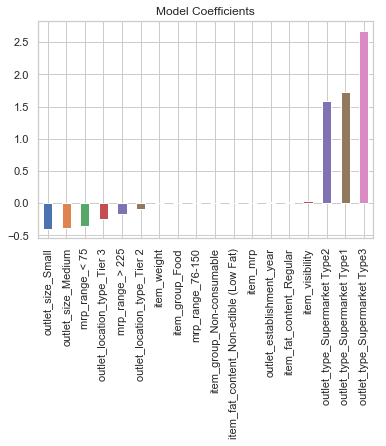

In [68]:
coef1 = pd.Series(lr.coef_, X.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

print(f'train score: {lr.score(X_train, y_train)}')
print(f'test score: {lr.score(X_test, y_test)}')

Text(0,0.5,'Predicted Y')

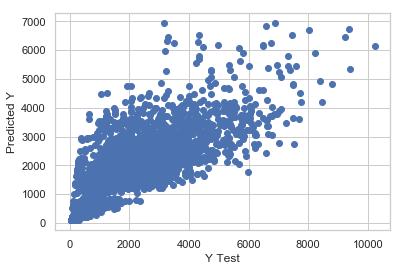

In [69]:
pred = lr.predict(X_test)

# inverse log back
plt.scatter(np.exp(y_test), np.exp(pred))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.40292796895193855
MSE: 0.27598911601433146
RMSE: 0.5253466627040962


(array([  2.,   5.,  11.,  25.,  47.,  82., 148., 294., 709., 497., 274.,
        162., 116.,  66.,  55.,  32.,  14.,   9.,   8.,   1.]),
 array([-3770.98054962, -3342.90708445, -2914.83361928, -2486.76015411,
        -2058.68668894, -1630.61322377, -1202.5397586 ,  -774.46629343,
         -346.39282826,    81.68063691,   509.75410208,   937.82756725,
         1365.90103242,  1793.97449759,  2222.04796276,  2650.12142793,
         3078.1948931 ,  3506.26835827,  3934.34182344,  4362.41528861,
         4790.48875378]),
 <a list of 20 Patch objects>)

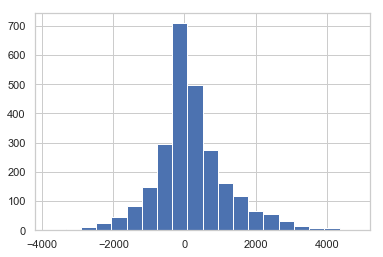

In [71]:
plt.hist(np.exp(y_test)-np.exp(pred), bins=20)

### Ridge Regression

In [72]:
rr = Ridge()

rr.fit(X_train, y_train)

# model coefficients
rr.coef_

array([ 2.06855134e-04,  1.75393163e-02,  7.44846951e-03,  1.30965655e-02,
        6.02379906e-03,  1.62611477e-02, -3.00831476e-01, -3.27928828e-01,
       -5.64049954e-02, -1.95474906e-01,  1.74392719e+00,  1.58632211e+00,
        2.60354350e+00,  1.67276324e-03,  6.02379906e-03,  5.40003783e-03,
       -3.53103163e-01, -1.75213311e-01])

train score: 0.7353185298265801
test score: 0.7365776650652507


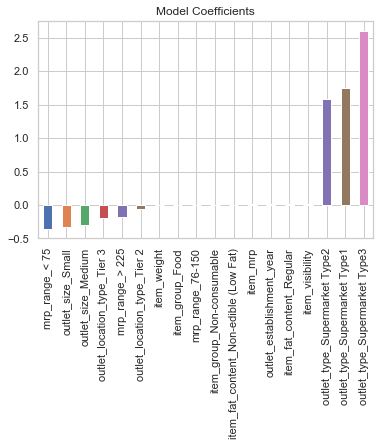

In [73]:
coef2 = pd.Series(rr.coef_, X.columns).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

print(f'train score: {rr.score(X_train, y_train)}')
print(f'test score: {rr.score(X_test, y_test)}')

Text(0,0.5,'Predicted Y')

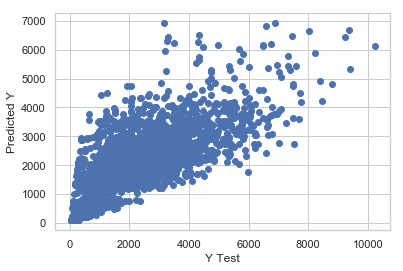

In [74]:
pred = rr.predict(X_test)

# inverse log back
plt.scatter(np.exp(y_test), np.exp(pred))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.40314208400180684
MSE: 0.27601839990175203
RMSE: 0.5253745329779053


(array([  2.,   4.,  13.,  23.,  49.,  82., 146., 299., 717., 494., 266.,
        162., 112.,  68.,  54.,  33.,  15.,   9.,   8.,   1.]),
 array([-3755.01807769, -3327.95425692, -2900.89043614, -2473.82661536,
        -2046.76279459, -1619.69897381, -1192.63515304,  -765.57133226,
         -338.50751148,    88.55630929,   515.62013007,   942.68395085,
         1369.74777162,  1796.8115924 ,  2223.87541317,  2650.93923395,
         3078.00305473,  3505.0668755 ,  3932.13069628,  4359.19451706,
         4786.25833783]),
 <a list of 20 Patch objects>)

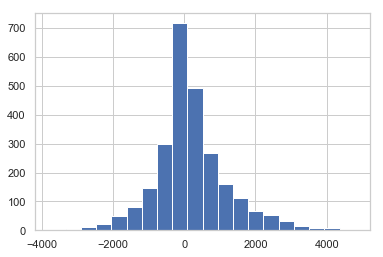

In [76]:
plt.hist(np.exp(y_test)-np.exp(pred), bins=20)

#### Parameter tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {'alpha': [0.1,1,10]}

kfold = KFold(n_splits=10, random_state=101, shuffle=True)

In [79]:
grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [80]:
best_param = grid_search.best_params_

best_score = grid_search.best_score_

print(f'best alpha: {best_param}')
print(f'best train score: {best_score}')

best alpha: {'alpha': 0.1}
best train score: 0.7325004724035935


### Lasso Regression

In [81]:
las = Lasso()

las.fit(X_train, y_train)

# model coefficients
las.coef_

array([-0.        , -0.        ,  0.00804157,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ])

train score: 0.2609470814548177
test score: 0.2537697487250954


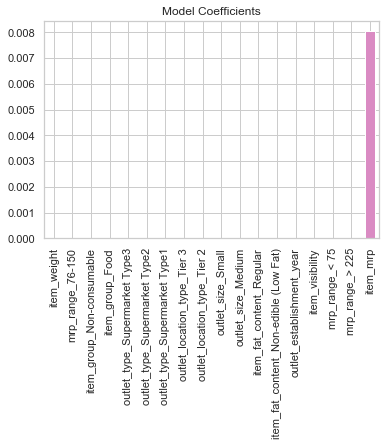

In [82]:
coef3 = pd.Series(las.coef_, X.columns).sort_values()
coef3.plot(kind='bar', title='Model Coefficients')

print(f'train score: {las.score(X_train, y_train)}')
print(f'test score: {las.score(X_test, y_test)}')

Text(0,0.5,'Predicted Y')

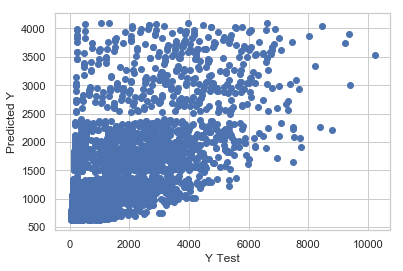

In [83]:
pred = las.predict(X_test)

# inverse log back
plt.scatter(np.exp(y_test), np.exp(pred))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.6671795057008162
MSE: 0.7819127408699107
RMSE: 0.8842582998592158


(array([ 12.,  13.,  31.,  61., 141., 237., 427., 492., 379., 260., 180.,
        126.,  90.,  52.,  18.,  19.,   6.,   7.,   3.,   3.]),
 array([-3730.85730684, -3209.17440171, -2687.49149658, -2165.80859146,
        -1644.12568633, -1122.4427812 ,  -600.75987607,   -79.07697094,
          442.60593419,   964.28883932,  1485.97174445,  2007.65464958,
         2529.33755471,  3051.02045984,  3572.70336497,  4094.3862701 ,
         4616.06917523,  5137.75208036,  5659.43498549,  6181.11789062,
         6702.80079575]),
 <a list of 20 Patch objects>)

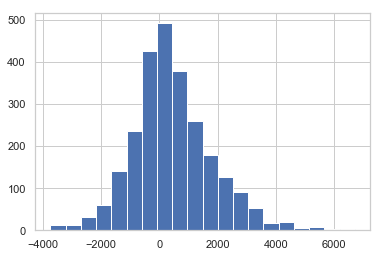

In [85]:
plt.hist(np.exp(y_test)-np.exp(pred), bins=20)

In [86]:
param_grid = {'alpha': [1, 0.01, 0.0001]}

In [87]:
grid_search = GridSearchCV(Lasso(max_iter=100000), param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 0.01, 0.0001]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [88]:
best_param = grid_search.best_params_

best_score = grid_search.best_score_

print(f'best alpha: {best_param}')
print(f'best train score: {best_score}')

best alpha: {'alpha': 0.0001}
best train score: 0.7325458430477925


### Compare Linear, Ridge and Lasso

Text(0.5,1,'Coeeficients')

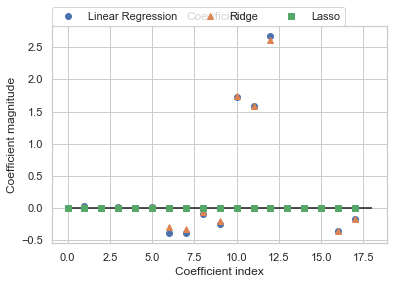

In [89]:
plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.plot(rr.coef_, '^', label='Ridge')
plt.plot(las.coef_, 's', label='Lasso')

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend(ncol=3, loc=(0,1))

plt.title('Coeeficients')

#### parameter tuned models

In [90]:
models_reg = []

models_reg.append(('LinReg', LinearRegression()))
models_reg.append(('RidReg', Ridge(alpha=0.1)))
models_reg.append(('LasReg', Lasso(alpha=0.1, max_iter=100000)))

In [91]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models_reg:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
    
    cv_results = np.sqrt(np.abs(cv_results))
    print(f'RMSE {name}: {cv_results.mean()} ({cv_results.std()})')
    print('\n')

LinReg: -0.2735419506356447 (0.012584999521821318)
RMSE LinReg: 0.5228737213137606 (0.012042516146733167)


RidReg: -0.2735392538390614 (0.012570310152711879)
RMSE RidReg: 0.522871468027376 (0.012028373204971531)


LasReg: -0.66178974936495 (0.040218775190863594)
RMSE LasReg: 0.8131189548692488 (0.025046249166103384)




In [92]:
lr = LinearRegression().fit(X_train, y_train)

rr = Ridge(alpha=0.1).fit(X_train, y_train)

las = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)

Text(0.5,1,'Coeeficients')

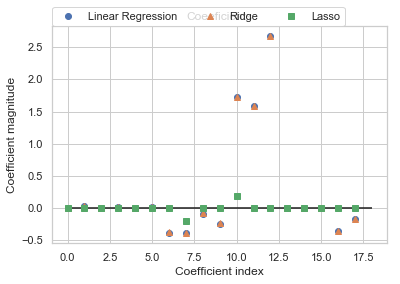

In [93]:
plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.plot(rr.coef_, '^', label='Ridge')
plt.plot(las.coef_, 's', label='Lasso')

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend(ncol=3, loc=(0,1))

plt.title('Coeeficients')

### Decision Tree Regressor

train score: 0.9999999998882435
test score: 0.4511244308109485


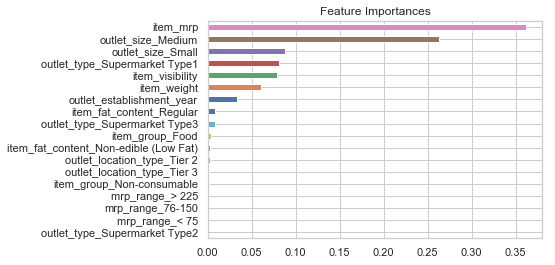

In [94]:
dtr = DecisionTreeRegressor(random_state=101)

dtr.fit(X_train, y_train)

coef4 = pd.Series(dtr.feature_importances_, X.columns).sort_values()
coef4.plot(kind='barh', title='Feature Importances')

print(f'train score: {dtr.score(X_train, y_train)}')
print(f'test score: {dtr.score(X_test, y_test)}')

In [95]:
pred = dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.5788026318945342
MSE: 0.5751211505670254
RMSE: 0.7583674245159964


### Random Forest Regressor

In [96]:
cv_results = cross_val_score(RandomForestRegressor(random_state=101), X_train, y_train, 
                             cv=kfold, scoring='neg_mean_squared_error')

cv_results = np.sqrt(np.abs(cv_results))

print(f'RMSE: {cv_results.mean()} ({cv_results.std()})')

RMSE: 0.5680855626195797 (0.013282423270318021)


train score:0.9446182921311057
test score: 0.6777930906315883


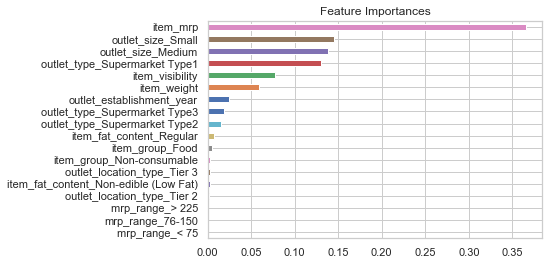

In [97]:
rfr = RandomForestRegressor(random_state=101)

rfr.fit(X_train, y_train)

coef5 = pd.Series(rfr.feature_importances_, X.columns).sort_values()
coef5.plot(kind='barh', title='Feature Importances')

print(f'train score:{rfr.score(X_train, y_train)}')
print(f'test score: {rfr.score(X_test, y_test)}')

In [98]:
pred = rfr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.4497612840327907
MSE: 0.3376138761475459
RMSE: 0.5810455026480679


#### feature selection

In [99]:
# use top 5 features
X_fs_train = X_train[['item_mrp','item_visibility','outlet_type_Supermarket Type1', 'outlet_type_Supermarket Type2',
                      'outlet_type_Supermarket Type3','item_weight', 'outlet_size_Medium', 'outlet_size_Small']]

In [100]:
cv_results = cross_val_score(RandomForestRegressor(random_state=101), X_fs_train, y_train, 
                             cv=kfold, scoring='neg_mean_squared_error')

cv_results = np.sqrt(np.abs(cv_results))

In [101]:
print(f'RMSE: {cv_results.mean()} ({cv_results.std()})')

RMSE: 0.5798998788050655 (0.0197637611601393)


- slighly better when choosing the top 5 features, not much change.

#### parameter tuning

In [109]:
# find max_features sqrt(18) is 4
param_grid = {'max_features': [n for n in range(1,4)]}

In [110]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=101), param_grid=param_grid, cv=kfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [111]:
grid_search.best_params_

{'max_features': 3}

In [112]:
grid_search.best_score_

0.6859046822604968

In [116]:
cv_results = cross_val_score(RandomForestRegressor(random_state=101, max_features=3), X_train, y_train, 
                             cv=kfold, scoring='neg_mean_squared_error')

cv_results = np.sqrt(np.abs(cv_results))

print(f'RMSE: {cv_results.mean()} ({cv_results.std()})')

RMSE: 0.566494511180441 (0.012947566174840011)
